In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style('white')
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
data = pd.read_csv('Train.csv')
data.shape

(8523, 12)

In [14]:
np.sum(data.isnull())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [16]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

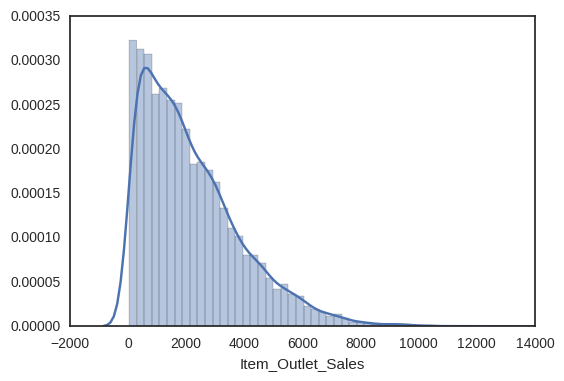

In [17]:
sns.distplot(data['Item_Outlet_Sales'])

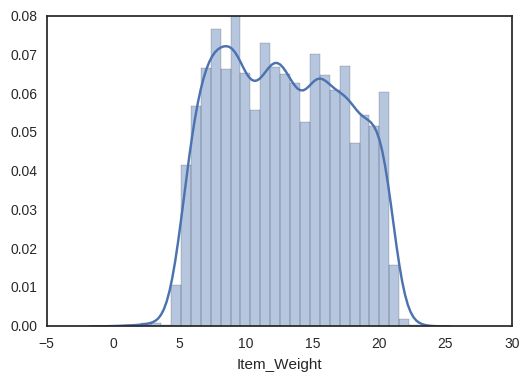

In [18]:
data['Item_Weight'] = data['Item_Weight'].interpolate(method = 'akima')
sns.distplot(data['Item_Weight'])

In [19]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].astype('object')
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [21]:
obj_feat = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
data1 = data[obj_feat].apply(LabelEncoder().fit_transform)
data2 = data.drop(obj_feat + ['Item_Outlet_Sales'], axis=1)
data1.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,9,4,1,0,1
1,2,14,3,8,1,2,2
2,1,10,9,4,1,0,1
3,2,6,0,3,2,2,0
4,1,9,1,1,0,2,1


In [22]:
data4 = pd.concat((data2,data1), axis=1)
data5 = data4.drop(['Item_Identifier'], axis=1)
data5.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1,4,9,4,1,0,1
1,5.92,0.019278,48.2692,2,14,3,8,1,2,2
2,17.50,0.016760,141.6180,1,10,9,4,1,0,1
3,19.20,0.000000,182.0950,2,6,0,3,2,2,0
4,8.93,0.000000,53.8614,1,9,1,1,0,2,1


In [23]:
0.07716381 Item_Weight
0.08117675 Item_Visibility
0.42425548 Item_MRP
0.03529769 Item_Fat_Content
0.06948451 Item_Type
0.04743827 Outlet_Identifier
0.02527916 Outlet_Establishment_Year
0.01323894 Outlet_Size --
0.00985046 Outlet_Location_Type --
0.21681493 Outlet_Type

SyntaxError: invalid syntax (<ipython-input-23-db6a10c134da>, line 1)

In [65]:
X = data5.values
Y = data['Item_Outlet_Sales'].values

#define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=10, init='normal', activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(200,activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=20, batch_size=2000, verbose=1)
estimator.fit(X,Y)

In [ ]:
#np.sqrt((np.sum((estimator.predict(X) - Y)**2))/8523)

In [54]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LarsCV,LassoLarsCV,RidgeCV
from sklearn.cross_validation import train_test_split

In [55]:
TrainX, testx, TrainY, testy = train_test_split(X,Y, test_size= 0.3, random_state=42)
TrainX.shape

(5966, 10)

In [67]:
clf = ExtraTreesRegressor(n_estimators=32, max_depth=10, min_samples_leaf=45, min_weight_fraction_leaf=0.5)
clf.fit(TrainX,TrainY)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=45,
          min_samples_split=2, min_weight_fraction_leaf=0.5,
          n_estimators=32, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [71]:
print clf.feature_importances_

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [72]:
mean_squared_error(clf.predict(testx),testy)**0.5

1675.4635583171264

In [ ]:
test = pd.read_csv('test.csv')
test['Item_Weight'] = test['Item_Weight'].interpolate(method = 'akima')
test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].astype('object')

In [ ]:
np.sum(test.isnull())

In [ ]:
obj_feat = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
test1 = test[obj_feat].apply(LabelEncoder().fit_transform)
test2 = test.drop(obj_feat + ['Item_Identifier'] , axis=1)
test3 = pd.concat((test2,test1), axis=1)
test3.head()

In [ ]:
pred = clf.predict(test3)
sub = pd.DataFrame(pred, columns=['Item_Outlet_Sales'])
sub1 = pd.read_csv('sample.csv')
sub2 = sub1.drop(['Item_Outlet_Sales'], axis=1)
sub3 = pd.concat((sub2,sub), axis=1)
sub3.head()

In [36]:
#sub3.to_csv('sample_done.csv')

(5966,)

In [87]:
import xgboost as xgb

xg = xgb.XGBRegressor(n_estimators=50)
xg.fit(TrainX, TrainY)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [89]:
mean_squared_error(xg.predict(testx),testy)**0.5

1057.2875192829745